In [1]:
#Assignment 4-(Simple Linear Regression)

In [2]:
#Q.1)Predict delivery time using Sorting time.

In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm
from scipy.stats import skew
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("delivery_time.csv")
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
#EDA And Data Visualisation

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [ ]:
#Feature Engineering

In [11]:
#renaming Columns
data=data.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [12]:
print(skew(data.delivery_time))

0.326702631656106


<AxesSubplot:xlabel='delivery_time'>

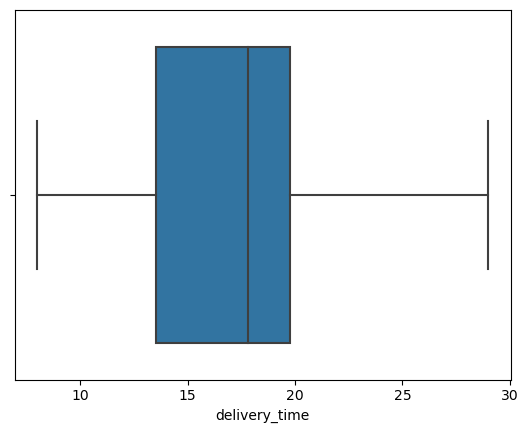

In [13]:
sns.boxplot(data['delivery_time'])

<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

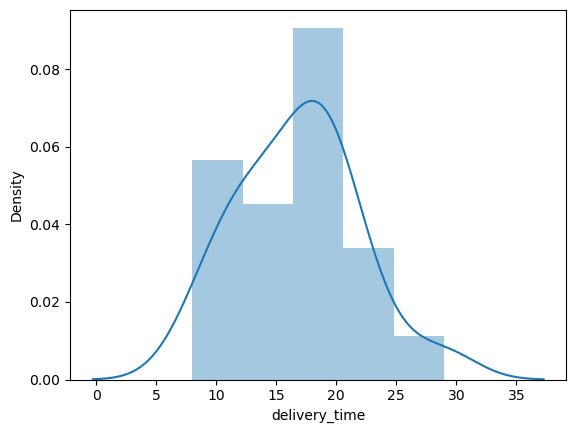

In [14]:
sns.distplot(data['delivery_time'])

In [15]:
print(skew(data.sorting_time))

0.043680994983108075


<AxesSubplot:xlabel='sorting_time'>

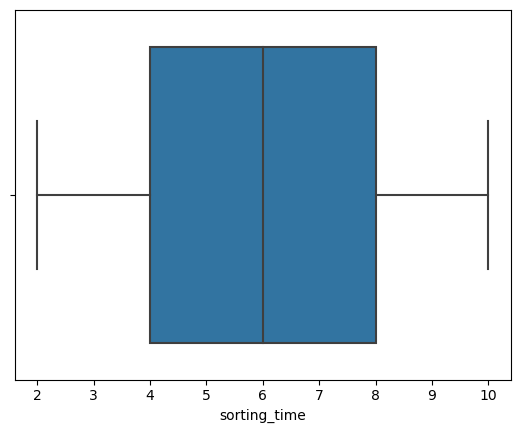

In [19]:
sns.boxplot(data['sorting_time'])

<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

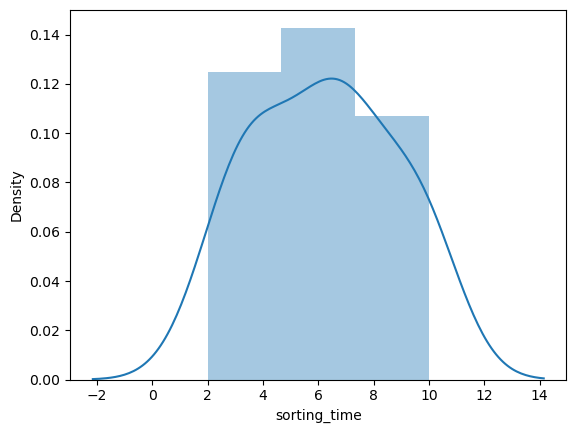

In [21]:
sns.distplot(data['sorting_time'])

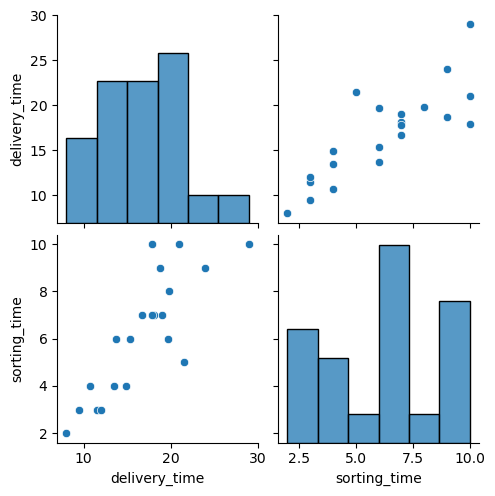

In [23]:
sns.pairplot(data)

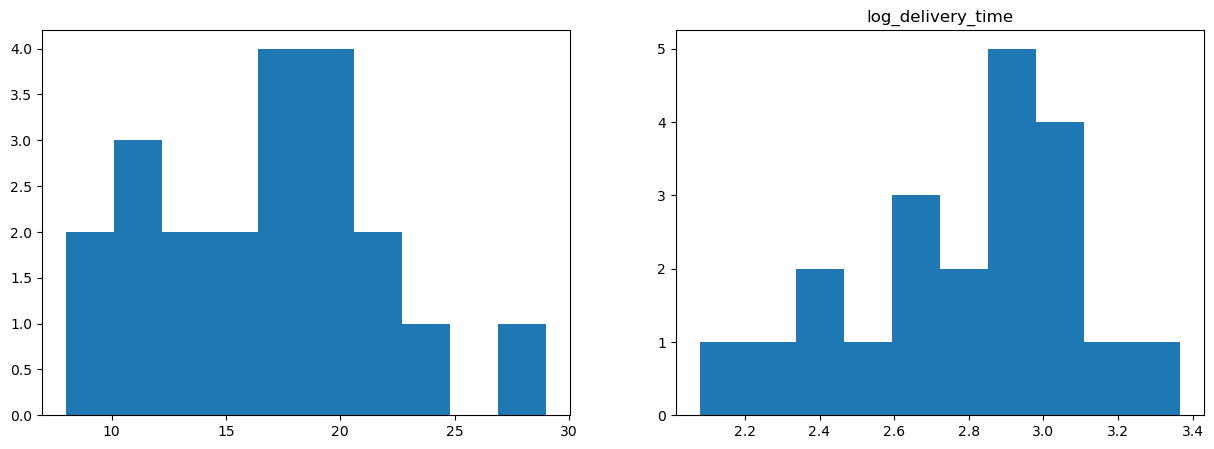

In [34]:
#Transformation for continuous Variable
#log Transformation
data['log_delivery_time']=np.log(data['delivery_time'])
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax[0].hist(data['delivery_time']);ax[0].set_title=('delivery_time')
ax[1].hist(data['log_delivery_time']);ax[1].set_title('log_delivery_time')
plt.show()                        

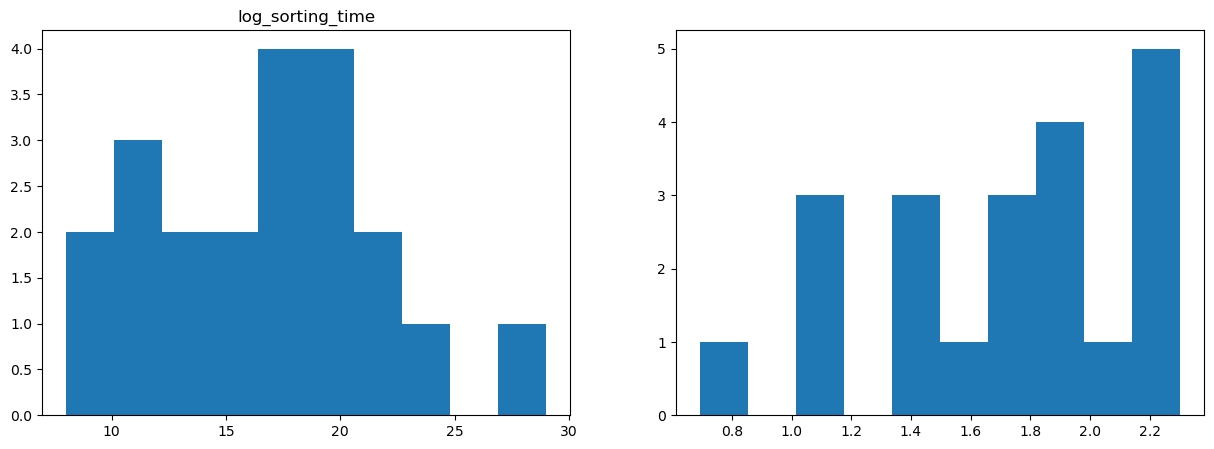

In [39]:
data['log_sorting_time']=np.log(data['sorting_time'])
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax[0].hist(data['delivery_time']);ax[0].set_title('sorting_time')
ax[1].hist(data['log_sorting_time']);ax[0].set_title('log_sorting_time')
plt.show()

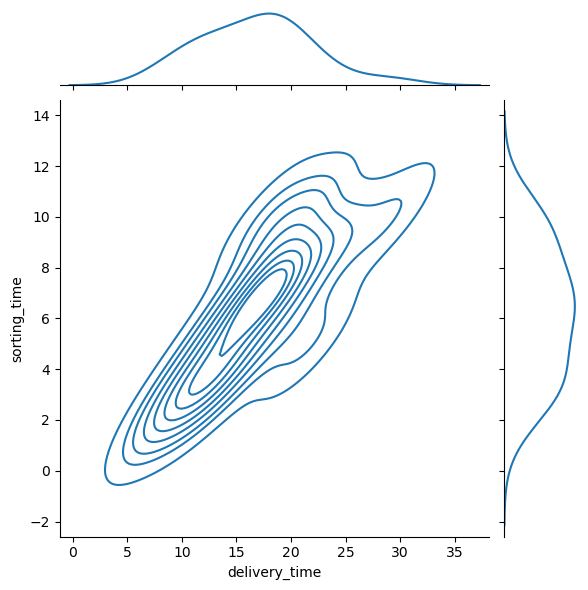

In [40]:
sns.jointplot(data['delivery_time'],data['sorting_time'],kind='kde')
plt.show()

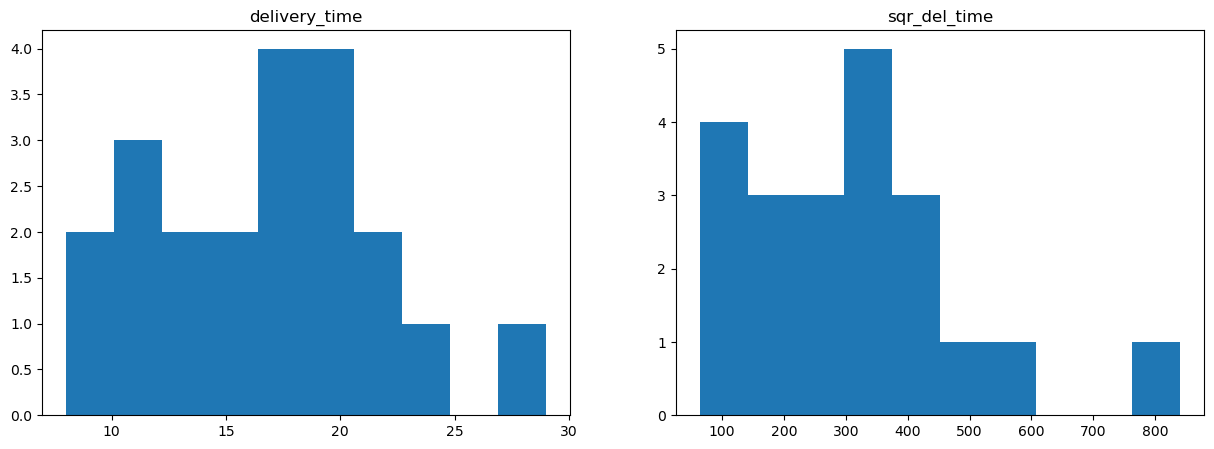

In [43]:
#square transformation
data['sqr_del_time']=np.square(data['delivery_time'])
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax[0].hist(data['delivery_time']);ax[0].set_title('delivery_time')
ax[1].hist(data['sqr_del_time']);ax[1].set_title('sqr_del_time')
plt.show()

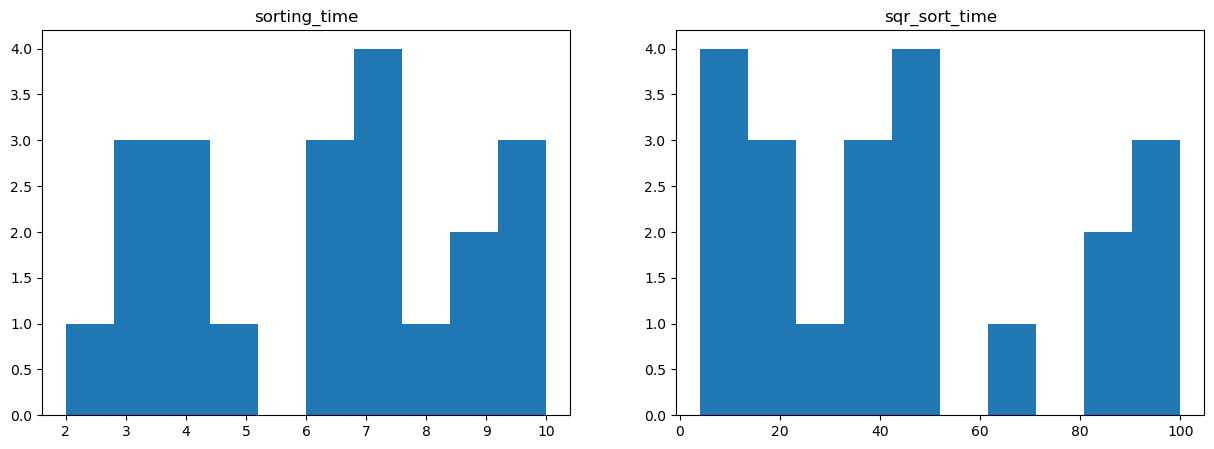

In [44]:
data['sqr_sort_time']=np.square(data['sorting_time'])
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax[0].hist(data['sorting_time']);ax[0].set_title('sorting_time')
ax[1].hist(data['sqr_sort_time']);ax[1].set_title('sqr_sort_time')
plt.show()

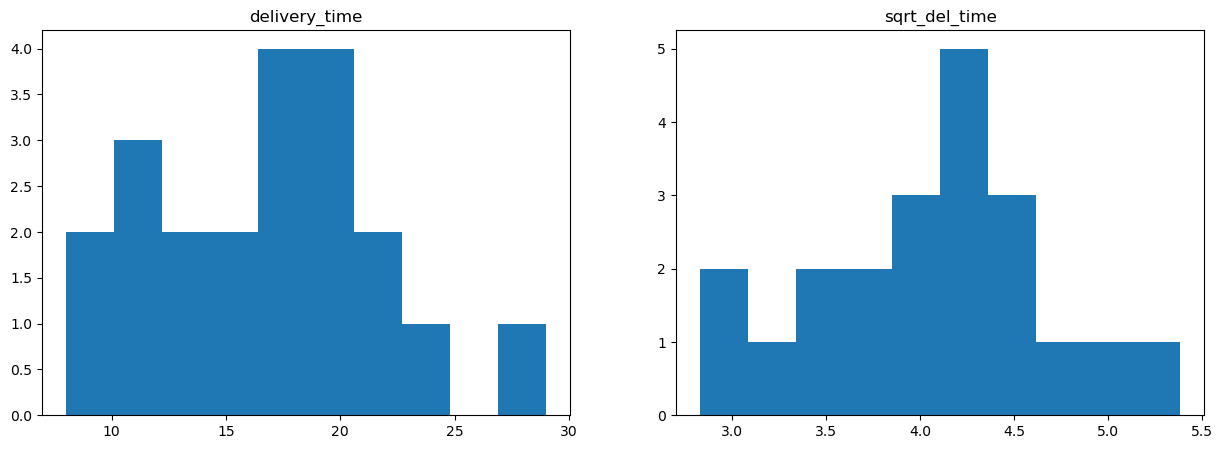

In [45]:
data['sqrt_del_time']=np.sqrt(data['delivery_time'])
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax[0].hist(data['delivery_time']);ax[0].set_title('delivery_time')
ax[1].hist(data['sqrt_del_time']);ax[1].set_title('sqrt_del_time')
plt.show()

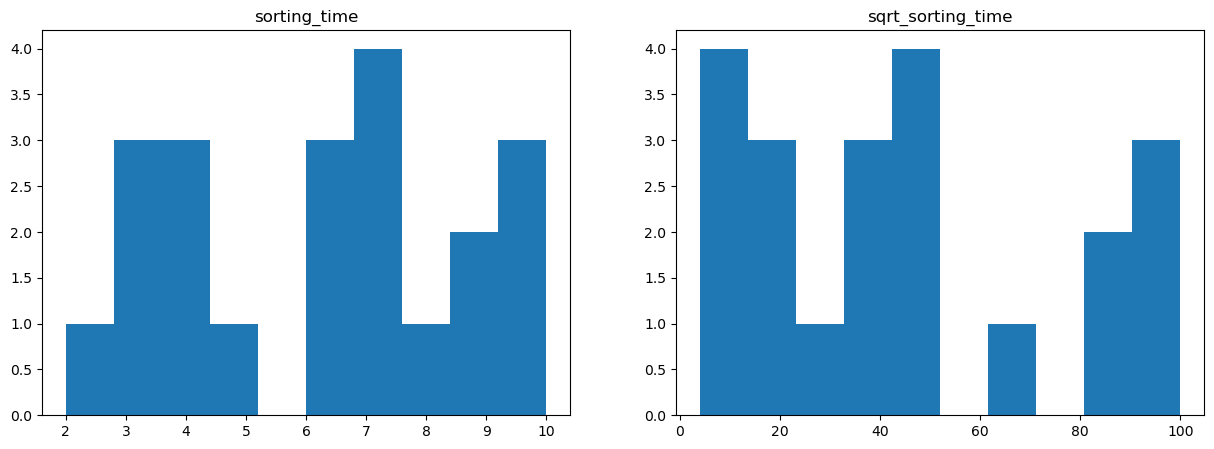

In [46]:
data['sqrt_sorting_time']=np.square(data['sorting_time'])
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax[0].hist(data['sorting_time']);ax[0].set_title('sorting_time')
ax[1].hist(data['sqrt_sorting_time']);ax[1].set_title('sqrt_sorting_time')
plt.show()

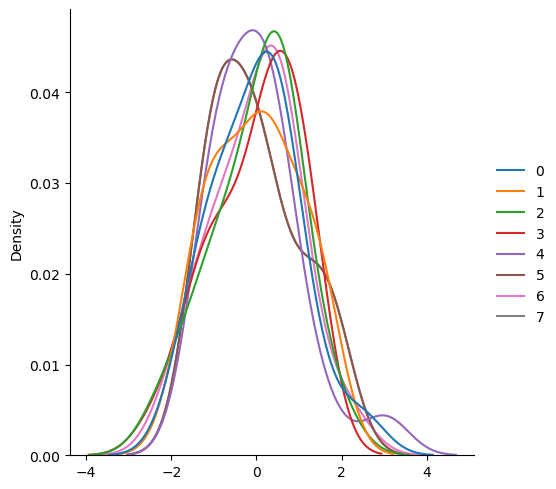

In [48]:
from sklearn.preprocessing import scale
data1=data.values
data2=scale(data1) #Used to standardise the dataset
sns.displot(data2,kind='kde')
plt.show()

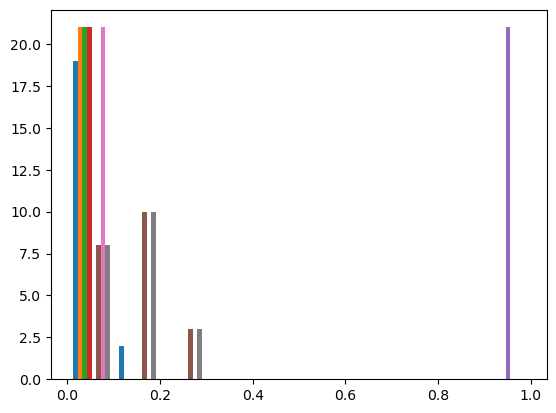

In [49]:
#Normalise the dataset
from sklearn.preprocessing import normalize
data2=normalize(data)
plt.hist(data2)
plt.show()

In [50]:
#model Building
model1=smf.ols('delivery_time~sorting_time',data=data).fit()

In [51]:
#model testing
#finding coefficient parameters
model1.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [53]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           3.98e-06
Time:                        09:05:41   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
#finding Rsquared Values
model1.rsquared,model1.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [55]:
#Model Prediction
delivery_time=(6.582734)+(1.649020)*(6)
delivery_time

16.476854

In [56]:
#Automatic Prediction for say sorting time 6,8
new_data=pd.Series([6,8])
new_data

0    6
1    8
dtype: int64

In [57]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,6
1,8


In [58]:
model1.predict(data_pred)

0    16.476853
1    19.774893
dtype: float64

In [ ]:
#Q.2) Build a prediction model for salary_hike

In [ ]:
#Building a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python

In [60]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [62]:
df=pd.read_csv("Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [63]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [67]:
#feature Engineering
df=df.rename(columns={'YearsExperience':'YE','Salary':'Sal'},inplace=False)
df.head()

,YE,Sal
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [68]:
print(skew(df.YE))

0.3603123252525561


<AxesSubplot:xlabel='YE'>

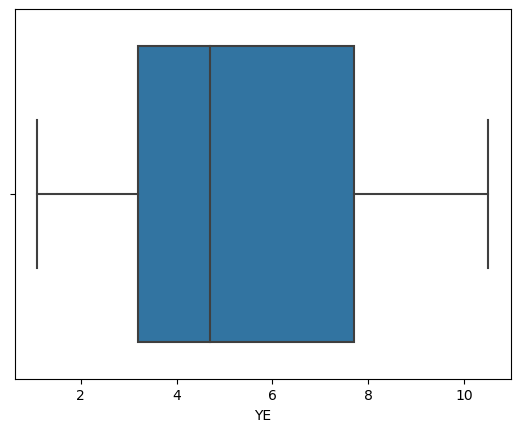

In [69]:
sns.boxplot(df.YE)

In [79]:
YE_mean=df['YE'].mean()
YE_mean

5.3133333333333335

In [ ]:
# The data for Year Experience is skewed right.
# All the observations lies in the intervals of approximately 3 to 8
# We can say that the median years of experience is 5.31 years.

<AxesSubplot:xlabel='YE', ylabel='Density'>

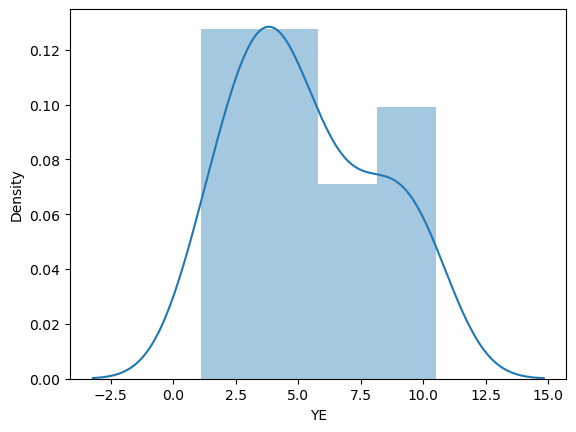

In [82]:
sns.distplot(df['YE'])

In [ ]:
# The distribution of Year Experience data is slightly more on the right tail of the curve.

In [83]:
print(skew(df.Sal))

0.3361618825592921


<AxesSubplot:xlabel='Sal'>

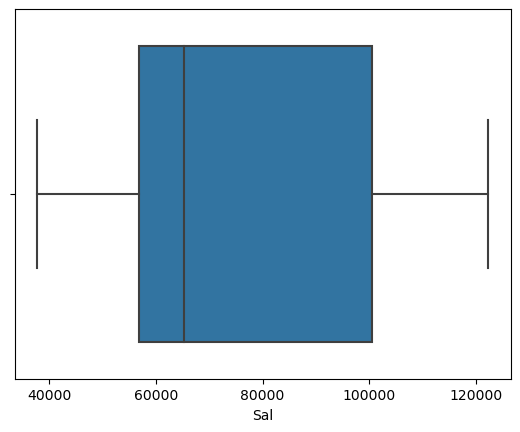

In [85]:
sns.boxplot(df['Sal'],orient='h')

<AxesSubplot:xlabel='Sal', ylabel='Density'>

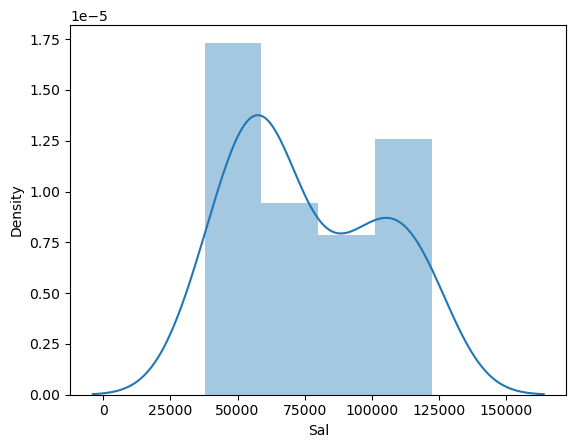

In [86]:
sns.distplot(df['Sal'])

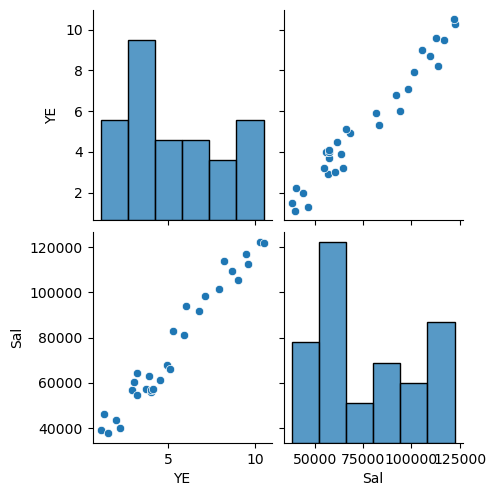

In [87]:
sns.pairplot(df)

<AxesSubplot:ylabel='Density'>

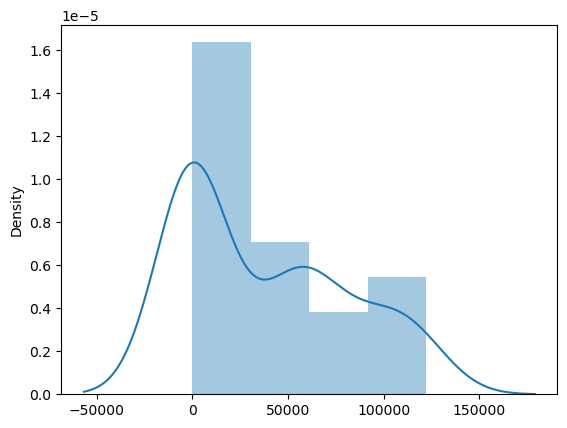

In [88]:
sns.distplot(df)

In [89]:
#Correlation Analysis

In [90]:
df.corr()

,YE,Sal
YE,1.000000,0.978242
Sal,0.978242,1.000000


<AxesSubplot:>

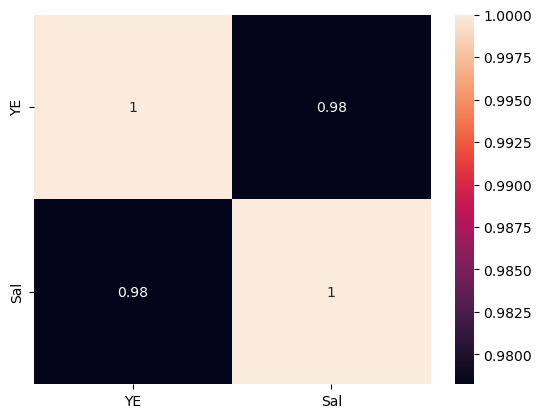

In [91]:
sns.heatmap(df.corr(),annot=True)

In [92]:
# Log Transformation:

Text(0.5, 1.0, 'log_YE')

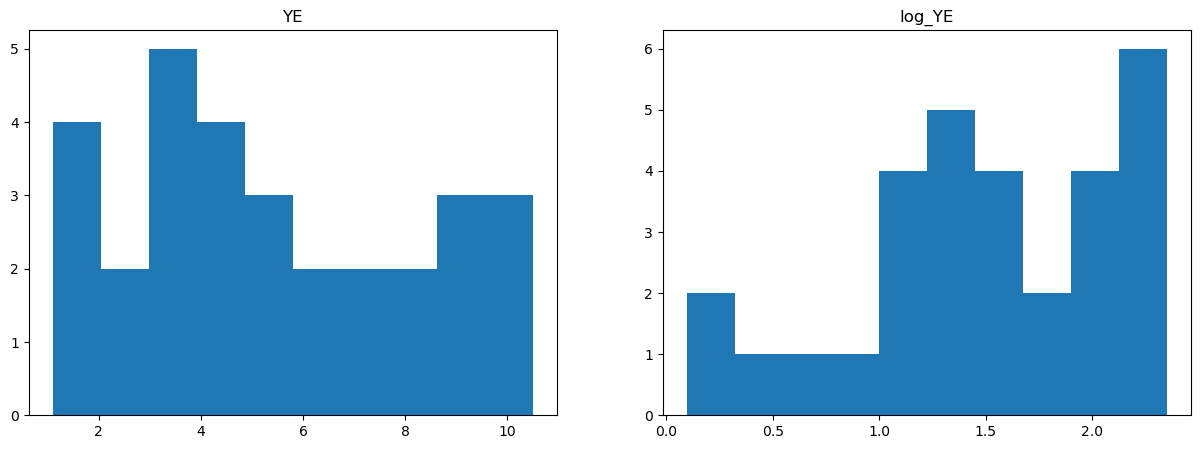

In [98]:
df['log_YE']=np.log(df['YE'])
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax[0].hist(df['YE']);ax[0].set_title('YE')
ax[1].hist(df["log_YE"]);ax[1].set_title('log_YE')


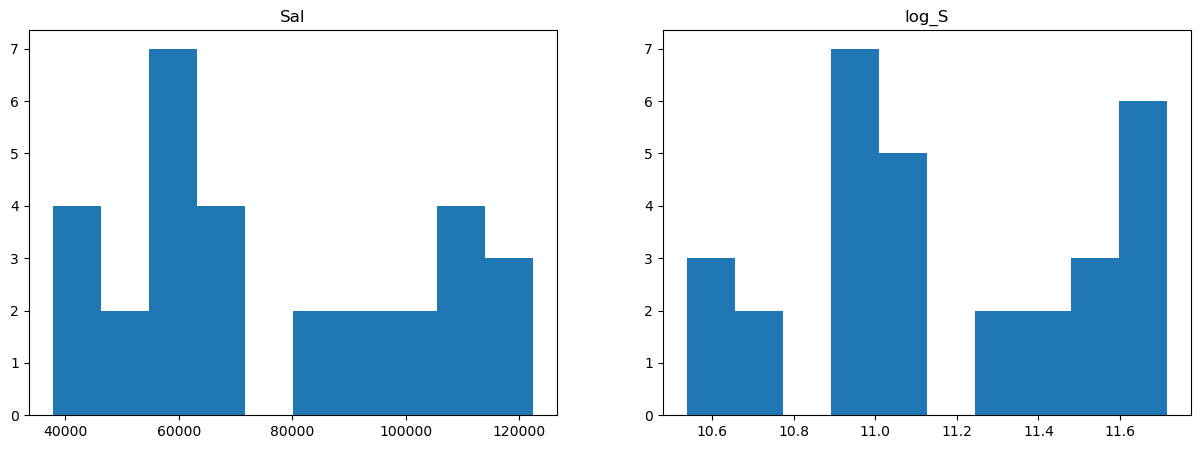

In [99]:
df['log_S']=np.log(df['Sal'])
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax[0].hist(df['Sal']);ax[0].set_title('Sal')
ax[1].hist(df['log_S']);ax[1].set_title('log_S')
plt.show()

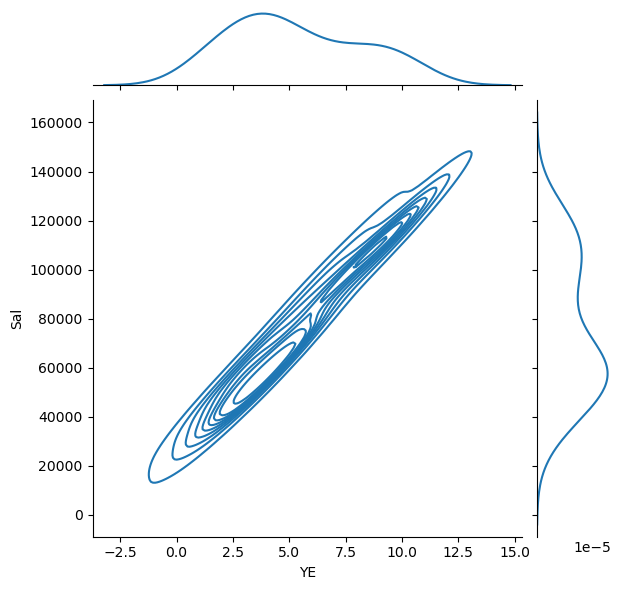

In [101]:
sns.jointplot(df['YE'],df['Sal'],kind='kde')

In [102]:
#squareTransformation

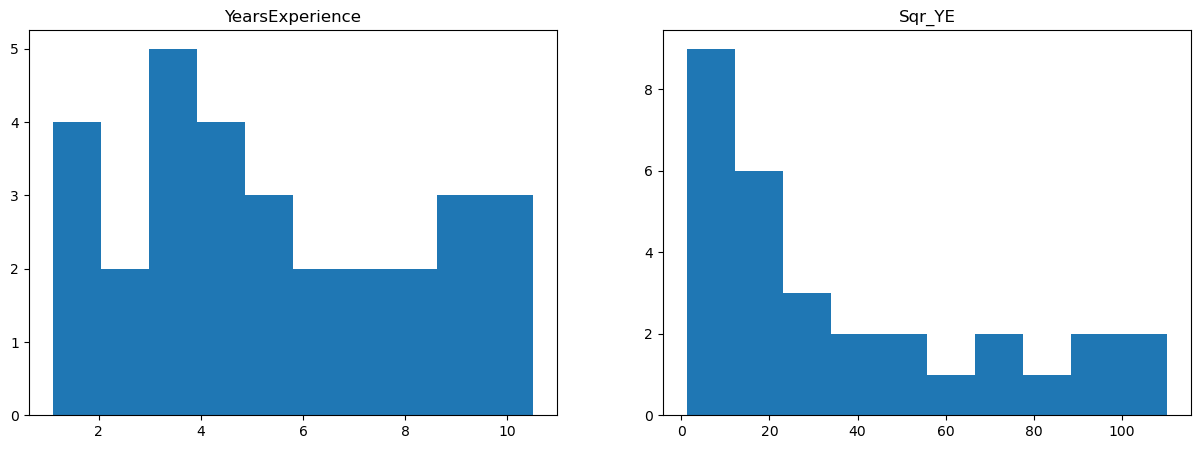

In [107]:
df['Sqr_YE']=np.square(df['YE'])
fig, ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax[0].hist(df['YE']);ax[0].set_title('YearsExperience')
ax[1].hist(df['Sqr_YE']);ax[1].set_title('Sqr_YE')
plt.show()                    

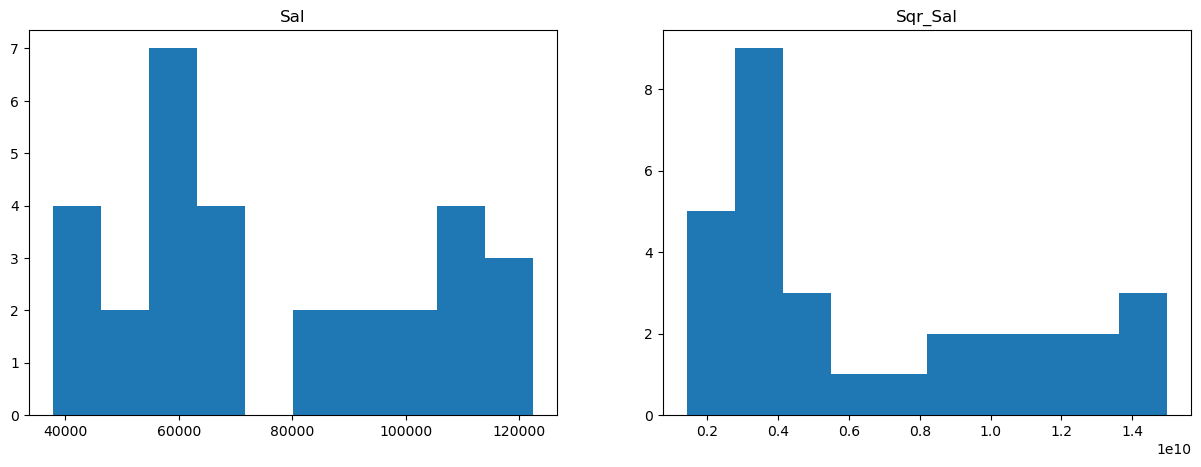

In [108]:
df['Sqr_Sal']=np.square(df['Sal'])
fig, ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax[0].hist(df['Sal']);ax[0].set_title('Sal')
ax[1].hist(df['Sqr_Sal']);ax[1].set_title('Sqr_Sal')
plt.show()    

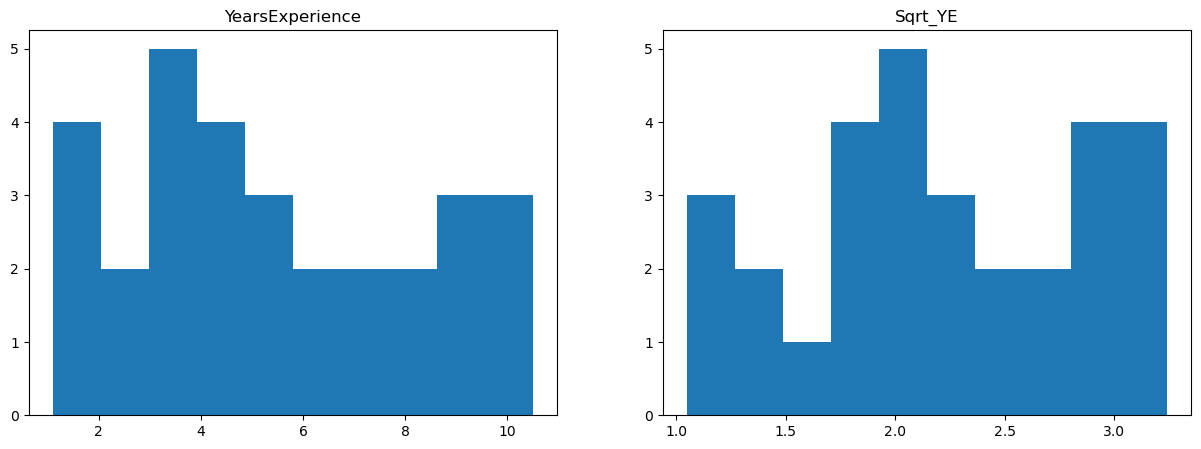

In [111]:
#square root Transformation:
df['Sqrt_YE']=np.sqrt(df['YE'])
fig, ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax[0].hist(df['YE']);ax[0].set_title('YearsExperience')
ax[1].hist(df['Sqrt_YE']);ax[1].set_title('Sqrt_YE')
plt.show()    

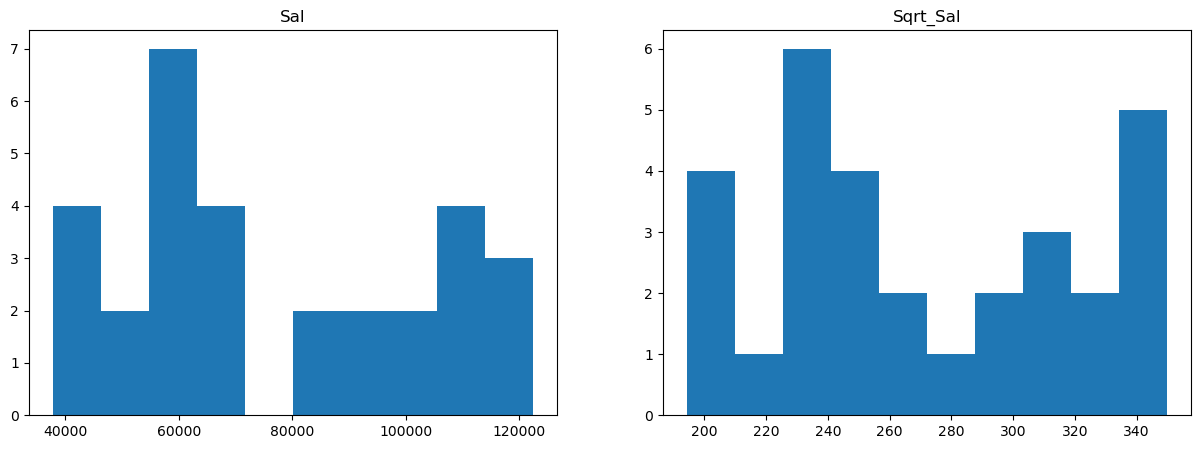

In [112]:
df['Sqrt_Sal']=np.sqrt(df['Sal'])
fig, ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax[0].hist(df['Sal']);ax[0].set_title('Sal')
ax[1].hist(df['Sqrt_Sal']);ax[1].set_title('Sqrt_Sal')
plt.show()

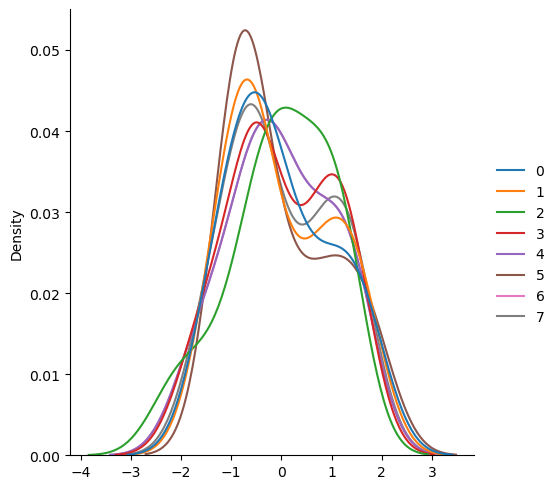

In [115]:
from sklearn.preprocessing import scale
df1=df.values
df2=scale(df1)#used to standardized the dataset
sns.displot(df2,kind='kde')
plt.show()

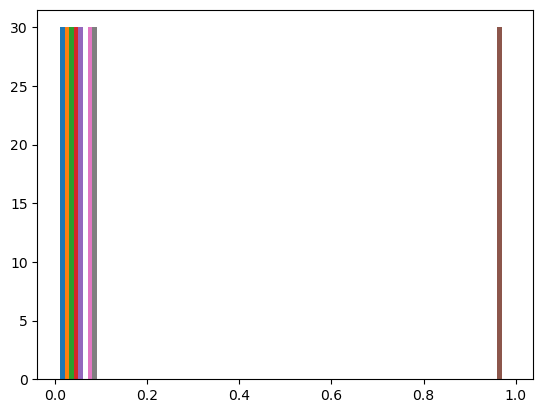

In [116]:
#normalize the dataset
from sklearn.preprocessing import normalize
df2=normalize(df)
plt.hist(df2)
plt.show()

In [121]:
#correlation Analysis
df.corr()

,YE,Sal,log_YE,log_S,Sqr_YE,Sqr_Sal,Sqrt_YE,Sqrt_Sal
YE,1.000000,0.978242,0.953797,0.965384,0.989850,0.973105,0.989850,0.974595
Sal,0.978242,1.000000,0.924061,0.988531,0.964884,0.991647,0.964884,0.997315
log_YE,0.953797,0.924061,1.000000,0.951428,0.986620,0.886512,0.986620,0.939719
log_S,0.965384,0.988531,0.951428,1.000000,0.971269,0.961261,0.971269,0.996920
Sqr_YE,0.989850,0.964884,0.986620,0.971269,1.000000,0.943786,1.000000,0.970541
Sqr_Sal,0.973105,0.991647,0.886512,0.961261,0.943786,1.000000,0.943786,0.979669
Sqrt_YE,0.989850,0.964884,0.986620,0.971269,1.000000,0.943786,1.000000,0.970541
Sqrt_Sal,0.974595,0.997315,0.939719,0.996920,0.970541,0.979669,0.970541,1.000000


<AxesSubplot:>

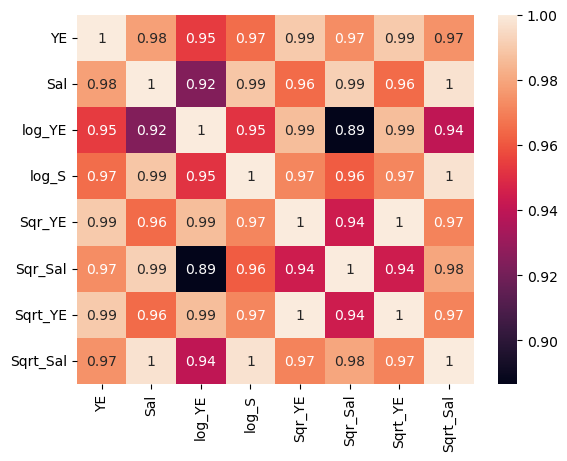

In [122]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Sal', ylabel='YE'>

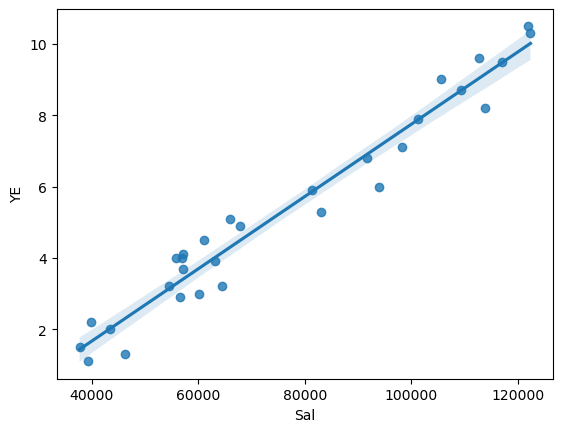

In [123]:
sns.regplot(x=df['Sal'],y=df['YE'])

# model Building

In [118]:
model=smf.ols('Sal~YE',data=df).fit()

In [119]:
#Model Testing
model.params

Intercept    25792.200199
YE            9449.962321
dtype: float64

In [120]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Sal   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           1.14e-20
Time:                        11:37:09   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YE          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
#Finding tvalues and tvalues
model.tvalues,model.pvalues

(Intercept    11.346940
 YE           24.950094
 dtype: float64,
 Intercept    5.511950e-12
 YE           1.143068e-20
 dtype: float64)

In [125]:
#finding Rsquared values
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [126]:
#Model prediction


In [127]:
#Manual prediction for say 2 years of Experience
salary=(25792.200199)+(9449.962321)*(4)
salary

63592.049483

In [128]:
#Automatic Prediction for say 4 & 5 years of experience
new_data=pd.Series([4,5])
new_data

0    4
1    5
dtype: int64

In [129]:
data_pred=pd.DataFrame(new_data,columns=['YE'])
data_pred

,YE
0,4
1,5


In [130]:
model.predict(data_pred)

0    63592.049484
1    73042.011806
dtype: float64

In [ ]:
#From the above answer we can say that this is the best model